<a href="https://colab.research.google.com/github/INSHAAALLAHPROGRAMMIST/AI-training/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import math

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
df=pd.read_csv("/content/Train.csv")
df.head(11)

id  customer_age     job_type  marital  education default  balance  \
0   id_43823          28.0   management   single   tertiary      no    285.0   
1   id_32289          34.0  blue-collar  married  secondary      no    934.0   
2   id_10523          46.0   technician  married  secondary      no    656.0   
3   id_43951          34.0     services   single  secondary      no      2.0   
4   id_40992          41.0  blue-collar  married    primary      no   1352.0   
5   id_12681          65.0      retired  married    primary      no   2880.0   
6   id_41178          57.0  blue-collar  married    primary      no    495.0   
7   id_35102          37.0   management  married   tertiary      no    650.0   
8   id_34750          29.0   technician  married  secondary      no    265.0   
9    id_1406          50.0  blue-collar  married  secondary      no    407.0   
10   id_2153          52.0  blue-collar  married   tertiary      no   1779.0   

   housing_loan personal_loan communication_type  day_of_month month  \
0           yes            no            unknown            26   jun   
1            no           yes           cellular            18   nov   
2            no            no           cellular             5   feb   
3           yes            no            unknown            20   may   
4           yes            no           cellular            13   may   
5            no            no           cellular            23   apr   
6            no            no           cellular            18   aug   
7           yes           NaN            unknown            26   may   
8           yes            no           cellular            19   aug   
9           yes           yes           cellular             7   aug   
10           no            no           cellular            19   nov   

    last_contact_duration  num_contacts_in_campaign  \
0                   303.0                       4.0   
1                   143.0                       2.0   
2                   101.0                       4.0   
3                   127.0                       3.0   
4                    49.0                       2.0   
5                   163.0                       1.0   
6                   687.0                       4.0   
7                   210.0                       1.0   
8                   160.0                       2.0   
9                   233.0                       2.0   
10                 1195.0                       3.0   

    days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                                NaN                           0   
1                              132.0                           1   
2                                NaN                           0   
3                                NaN                           0   
4                                NaN                           0   
5                                NaN                           0   
6                                NaN                           0   
7                                NaN                           0   
8                                NaN                           0   
9                                NaN                           0   
10                             160.0                           1   

   prev_campaign_outcome  term_deposit_subscribed  
0                unknown                        0  
1                  other                        0  
2                unknown                        0  
3                unknown                        0  
4                unknown                        0  
5                unknown                        1  
6                unknown                        1  
7                unknown                        0  
8                unknown                        0  
9                unknown                        0  
10               failure                        0

In [7]:
df.describe(include='all')

id  customer_age     job_type  marital  education default  \
count      31647  31028.000000        31647    31497      31647   31647   
unique     31647           NaN           12        3          4       2   
top     id_43823           NaN  blue-collar  married  secondary      no   
freq           1           NaN         6816    18945      16247   31094   
mean         NaN     40.439216          NaN      NaN        NaN     NaN   
std          NaN     10.751392          NaN      NaN        NaN     NaN   
min          NaN     18.000000          NaN      NaN        NaN     NaN   
25%          NaN     32.000000          NaN      NaN        NaN     NaN   
50%          NaN     39.000000          NaN      NaN        NaN     NaN   
75%          NaN     48.000000          NaN      NaN        NaN     NaN   
max          NaN     97.000000          NaN      NaN        NaN     NaN   

              balance housing_loan personal_loan communication_type  \
count    31248.000000        31647         31498              31647   
unique            NaN            2             2                  3   
top               NaN          yes            no           cellular   
freq              NaN        17700         26463              20480   
mean      1368.112615          NaN           NaN                NaN   
std       3085.342417          NaN           NaN                NaN   
min      -8020.000000          NaN           NaN                NaN   
25%         72.000000          NaN           NaN                NaN   
50%        449.000000          NaN           NaN                NaN   
75%       1413.000000          NaN           NaN                NaN   
max     102128.000000          NaN           NaN                NaN   

        day_of_month  month  last_contact_duration  num_contacts_in_campaign  \
count   31647.000000  31647           31336.000000              31535.000000   
unique           NaN     12                    NaN                       NaN   
top              NaN    may                    NaN                       NaN   
freq             NaN   9685                    NaN                       NaN   
mean       15.818561    NaN             256.184038                  2.776629   
std         8.322970    NaN             256.181479                  3.153293   
min         1.000000    NaN               0.000000                  1.000000   
25%         8.000000    NaN             103.000000                  1.000000   
50%        16.000000    NaN             179.000000                  2.000000   
75%        21.000000    NaN             315.250000                  3.000000   
max        31.000000    NaN            4900.000000                 63.000000   

        days_since_prev_campaign_contact  num_contacts_prev_campaign  \
count                        5816.000000                31647.000000   
unique                               NaN                         NaN   
top                                  NaN                         NaN   
freq                                 NaN                         NaN   
mean                          224.995186                    0.591620   
std                           114.991828                    2.499675   
min                             1.000000                    0.000000   
25%                           133.000000                    0.000000   
50%                           195.000000                    0.000000   
75%                           329.000000                    0.000000   
max                           871.000000                  275.000000   

       prev_campaign_outcome  term_deposit_subscribed  
count                  31647             31647.000000  
unique                     4                      NaN  
top                  unknown                      NaN  
freq                   25833                      NaN  
mean                     NaN                 0.107246  
std                      NaN                 0.309430  
min                      NaN              

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

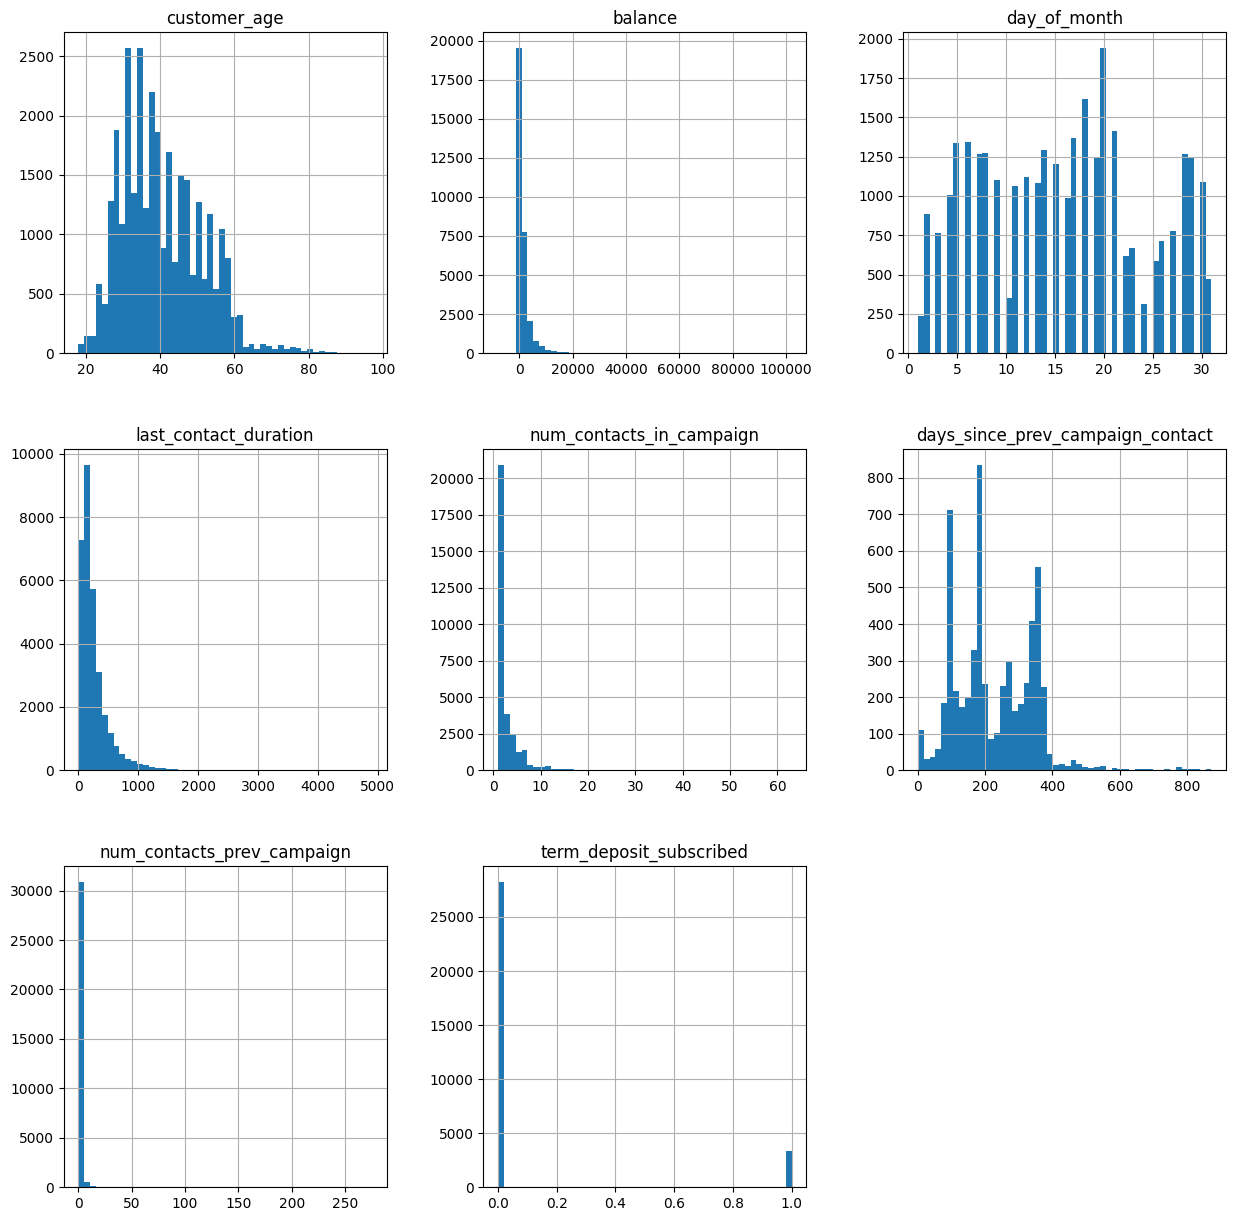

In [22]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15,15))
plt.show()

In [23]:
from ydata_profiling import ProfileReport
ProfileReport(df, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df['job_type'].unique()

array(['management', 'blue-collar', 'technician', 'services', 'retired',
       'entrepreneur', 'admin.', 'student', 'housemaid', 'self-employed',
       'unknown', 'unemployed', nan], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:

kategoriya = ['management','blue-collar','technician','service','retired','entrepreneur','admin.','student','housemaid','self-employed','unknown','unemployed']
Oe = OrdinalEncoder(categories = [kategoriya])
df['job_type'] = Oe.fit_transform(df['job_type'])
df.head(7)

ValueError: Expected 2D array, got 1D array instead:
array=['management' 'blue-collar' 'technician' ... 'technician' 'services' nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.